In [37]:
#Here goes the 2 class Explainability!! Based on correct prediction only

In [38]:
!pip install shap

In [39]:
import numpy as np
import pickle

with open("shaps_values_all_full", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open("y_test_all_full", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open("y_pred_all_full", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


In [ ]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples
print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (258, 1, 56, 768, 2)
[[[[[-2.47416458e-05  2.47417144e-05]
    [-1.15267885e-05  1.15273162e-05]
    [-5.22218369e-06  5.22290929e-06]
    ...
    [-5.79627668e-06  5.79670837e-06]
    [ 1.14467406e-06 -1.14424291e-06]
    [ 4.11862737e-06 -4.11827516e-06]]

   [[ 1.03365898e-06 -1.03340414e-06]
    [ 1.15584365e-05 -1.15595817e-05]
    [ 2.32927433e-05 -2.32939243e-05]
    ...
    [ 1.61878233e-05 -1.61877573e-05]
    [-3.43079423e-06  3.43069644e-06]
    [ 5.31645874e-06 -5.31642417e-06]]

   [[ 7.38905283e-06 -7.38806986e-06]
    [ 3.65995321e-06 -3.65939846e-06]
    [-1.90551352e-05  1.90547681e-05]
    ...
    [-8.97288085e-06  8.97306769e-06]
    [ 1.34959969e-06 -1.34925044e-06]
    [-1.70559482e-05  1.70561797e-05]]

   ...

   [[ 8.36516394e-06 -8.36540460e-06]
    [ 1.16194487e-05 -1.16193779e-05]
    [ 4.81670459e-07 -4.81018095e-07]
    ...
    [ 1.58499061e-05 -1.58496607e-05]
    [ 2.28862838e-06 -2.28847148e-06]
    [-8.11090

In [41]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


nSub=5
for sub in range(nSub):
    if sub==0:
        shap_values_kmi=np.array(shap_values_all[sub][0])
        shap_values_vmi=np.array(shap_values_all[sub][1])

    else:
        temp=np.array(shap_values_all[sub][0])
        shap_values_kmi=np.concatenate((shap_values_kmi,temp),axis=0)

        temp=np.array(shap_values_all[sub][1])
        shap_values_vmi=np.concatenate((shap_values_vmi,temp),axis=0)
        


shap_values_kmi =np.squeeze(shap_values_kmi)
shap_values_vmi =np.squeeze(shap_values_vmi)

print('Shape of all SHAP values for NT class: ', np.shape(shap_values_kmi))
print('Shape of all SHAP values for ST class: ', np.shape(shap_values_vmi))

y_test_all=np.concatenate( y_test_all, axis=0 )
y_pred_all=np.concatenate( y_pred_all, axis=0 )

print('Shape of all y_test array: ', np.shape(y_test_all))
print('Shape of all y_pred array: ', np.shape(y_pred_all))



Shape of all SHAP values for NT class:  (5, 56, 768, 2)
Shape of all SHAP values for ST class:  (5, 56, 768, 2)
Shape of all y_test array:  (1287,)
Shape of all y_pred array:  (1287, 2)


In [42]:
SHAPS_0=[]
SHAPS_1=[]

print(np.shape(y_test_all))
print(np.shape(y_pred_all))
print(np.shape(shap_values_kmi))

y_pred_classes = np.argmax(y_pred_all, axis=1)

for i in range(len(y_test_all)):
    if y_test_all[i] == y_pred_classes[i]:
        if y_test_all[i] == 0:
            SHAPS_0.append(np.squeeze(shap_values_kmi[i]))
        else:
            SHAPS_1.append(np.squeeze(shap_values_vmi[i]))
print('Instances of correct 0 class: ', len(SHAPS_0))
print('Instances of correct 1 class: ', len(SHAPS_1))
print('A sample shape of a single SHAP after squeeze: ', np.shape(shap_values_vmi[i]))

SHAPS_0=np.stack( SHAPS_0, axis=0 )
SHAPS_1=np.stack( SHAPS_1, axis=0 )
print('Converting List of Final SHAPS_0 into array:' ,np.shape(SHAPS_0))
print('Converting List of Final SHAPS_1 into array:' ,np.shape(SHAPS_1))

(1287,)
(1287, 2)
(5, 56, 768, 2)


IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
SHAPS_0 = np.mean(np.abs(SHAPS_0),axis=0)
SHAPS_1 = np.mean(np.abs(SHAPS_1),axis=0)

In [ ]:
SHAPS_0 = np.save('SHAPS_0.npy', SHAPS_0 ,allow_pickle=True)
SHAPS_1 = np.save('SHAPS_1.npy', SHAPS_1 ,allow_pickle=True)


(1130, 56, 768)
[[[1.41892289e-04 2.88151300e-05 4.42830573e-05 ... 3.55146271e-04
   1.31161632e-04 6.21397820e-05]
  [1.46771731e-04 3.10535787e-04 3.47054014e-04 ... 2.12091950e-03
   1.63147852e-03 1.88960406e-03]
  [3.26512458e-05 6.75594801e-05 2.03040172e-04 ... 4.24999162e-04
   4.54356528e-04 7.94673651e-04]
  ...
  [3.03463519e-05 1.11093484e-04 9.58921203e-05 ... 4.45914213e-04
   2.33047770e-04 1.49995190e-04]
  [2.13963127e-04 3.47103712e-04 2.09728925e-04 ... 8.93621882e-04
   8.17911068e-04 9.97022094e-04]
  [5.18920396e-05 9.17158534e-05 7.00634955e-05 ... 6.50991629e-04
   6.10970474e-04 1.14793590e-03]]

 [[4.66218483e-04 1.46048956e-03 1.88844942e-03 ... 8.13867422e-05
   1.21112108e-04 6.24522619e-04]
  [1.09625537e-03 6.07605375e-04 1.59998976e-04 ... 1.48751177e-03
   1.10082840e-03 9.23731258e-04]
  [1.24812238e-03 1.42660486e-03 5.36463000e-04 ... 1.09786383e-04
   1.88993215e-05 1.69968189e-04]
  ...
  [7.80825949e-05 4.77831339e-04 1.78863081e-03 ... 1.0654268

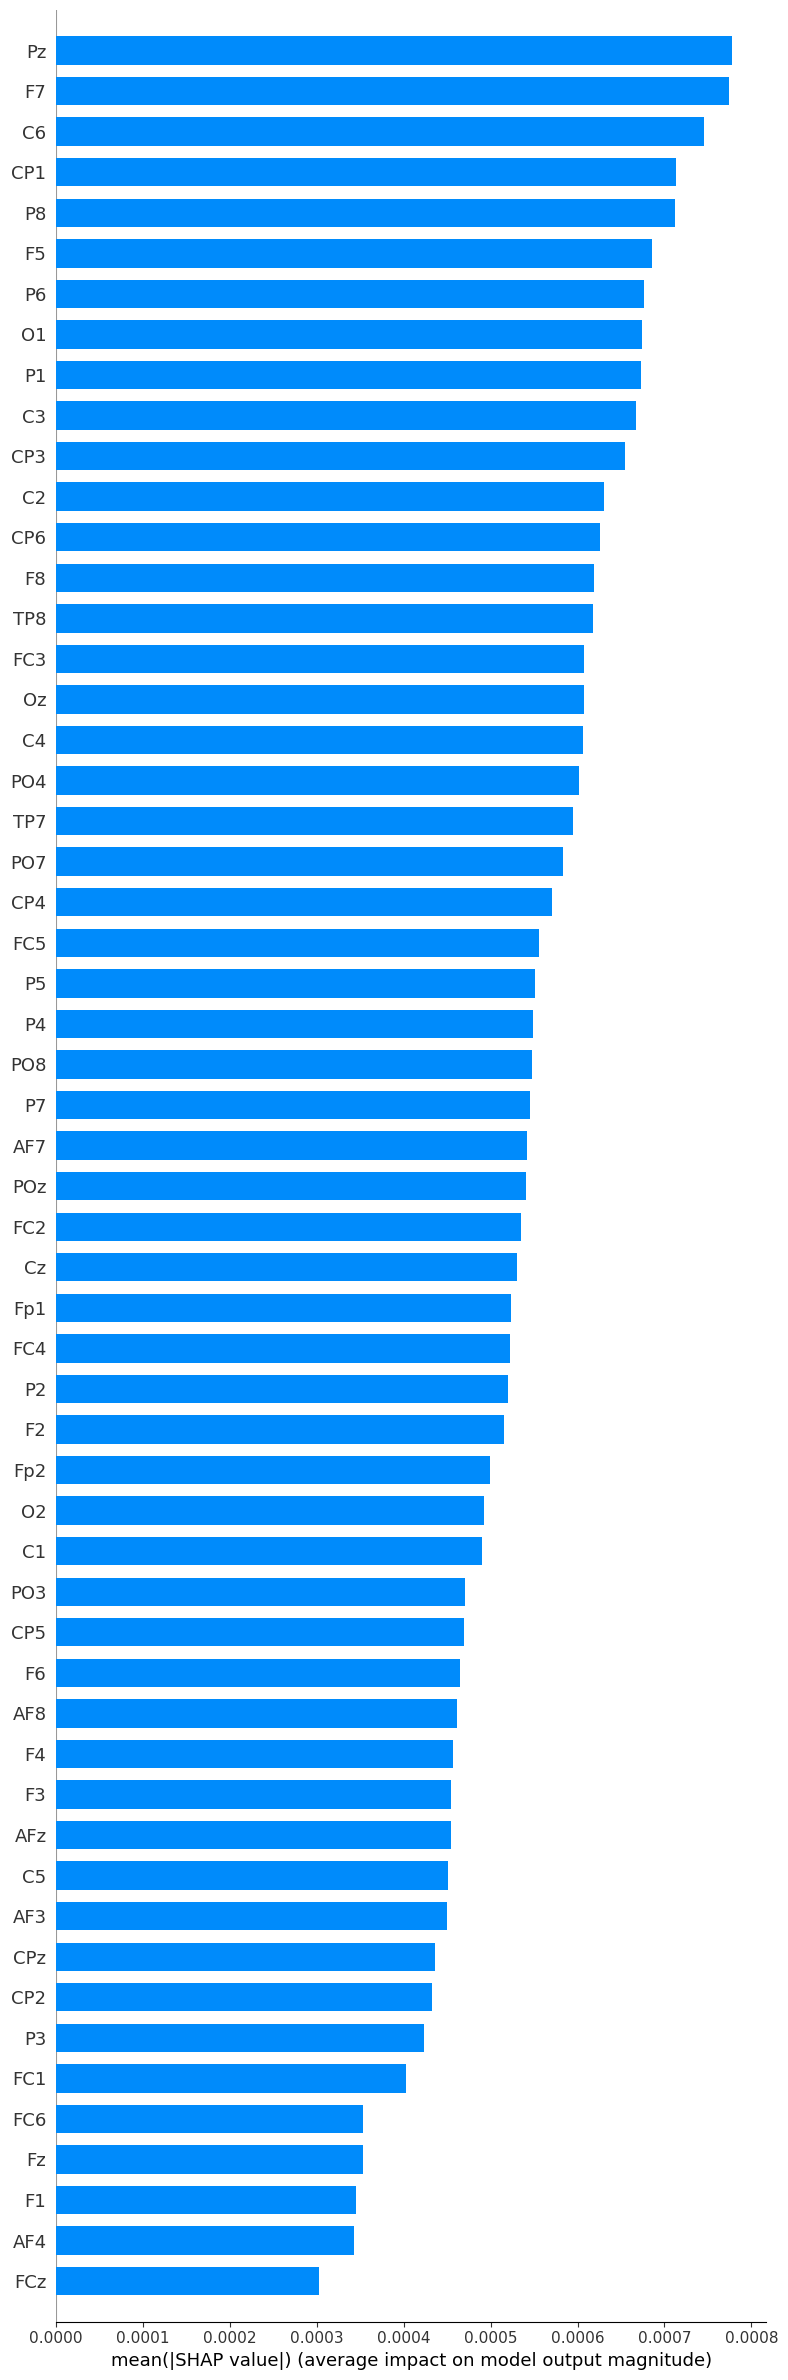

In [ ]:
import shap
import matplotlib.pyplot as plt

names = ['Fp1','Fz','F3','F7','FC5','FC1','C3','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','CP6','CP2','Cz','C4','FC6','FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FC3','C1','C5','TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4','TP8','C6','C2','FC4','F6','AF8','AF4','F2','FCz']
allCond = np.concatenate((SHAPS_0,SHAPS_1),axis=0)
allCond= np.abs(allCond)
print(np.shape(allCond))
print(allCond)
fig=shap.summary_plot(np.mean(allCond,axis=2), plot_type = 'bar', feature_names = names, max_display = 56,show=False)
plt.savefig('shap.jpg', format='jpg')



In [ ]:
#Here goes the individual explainability

In [ ]:
import numpy as np
import pickle

with open("./SHAP/ATC_NTvsST/shaps_values_all", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open("./SHAP/ATC_NTvsST/y_test_all", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open("./SHAP/ATC_NTvsST/y_pred_all", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


In [ ]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples

print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (2, 131, 1, 56, 400)
Shape of a random y_test in the list:  (131,)
Shape of a random y_pred in the list:  (131,)


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

shap_sub=[]

nSub=16
for sub in range(nSub):
    shap_values_sub=np.array(shap_values_all[sub])
    temp=[]
    for i in range(len(y_test_all[sub])):
        if y_test_all[sub][i]== y_pred_all[sub][i]:
            if y_test_all[sub][i] == 0:
                temp.append(np.squeeze(shap_values_sub[0,i,:,:,:]))
            if y_test_all[sub][i] == 1:
                temp.append(np.squeeze(shap_values_sub[1,i,:,:,:]))
    shap_sub.append(np.mean(np.abs(np.array(temp)),axis=0))


print(np.shape(shap_sub[0]))
 


(56, 400)


In [ ]:
best_ch=[]
n=10 #how many best channels
for sub in range(nSub):
    temp=shap_sub[sub]
    temp=np.mean(np.abs(temp),axis=1)
    print((-temp).argsort()[:n])
    best_ch.append((-temp).argsort()[:n])


[26 30 24  0 52  3 25 51 33 28]
[26 52 25  3 13 30 46  0 33 53]
[26  0 25 30 52 24 37  3 28 38]
[25 26 52 30  3 51 24  4 11  0]
[ 3 26 52 30 24 25  9 51  4  0]
[24 26  3 30 52 25 51 33 21 48]
[26 52 38 25 30 13 34 24 51  3]
[52 26 30 25  0  3 44 53 28 41]
[52 26 25  3 24  4 30 51 36  0]
[24 26  3 50 52 30  4 51 25 19]
[26  3 52 30 25 24 53 38 51 33]
[26 28 52 24 25 30  3 51  4  1]
[52 26  3 30 25 51 37  0 24 33]
[26 52 25 24 33 12 51 30  0 27]
[26 25 52  3 33 24 30 21  0 23]
[52  0  3 26 30 25 51 44 24 28]


In [ ]:
np.save('best_ch.npy', best_ch ,allow_pickle=True)
